In [1]:
import pandas as pd
import numpy as np
import pyarrow
import os
import math
import re
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [2]:
path1 = r'E:\netData\APS\3 Paper\aps-papers-2010-CD5.zip'
path2 = r'E:\netData\APS\3 Paper\aps-papers-2010-SB.zip'
path3 = r'E:\netData\APS\3 Paper\nodepro2010.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [7]:
f2['CD5'] = f1['CD5']
f2['indegree'] = f3['indegree']
f2['cit5'] = f3['cit5']
f2['outdegree'] = f3['outdegree']
f2['year'] = f3['year']
f2['team size'] = f3['team size']
f2['first_cit_y'] = f3['first_cit_y']

In [5]:
df = f2[f2['indegree']>10]
df = df[df['outdegree']>0]

In [6]:
fdes = df.describe().T
fdes['kurt'] = df.kurt()
fdes['skew'] = df.skew()
fdes.T.to_excel(r'G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\table2.xlsx')

In [7]:
fdes

,count,mean,std,min,25%,50%,75%,max,kurt,skew
id,114185.0,244084.782966,147676.113005,97.0,115185.000000,253844.000000,396033.000000,463347.000000,-1.434399,-0.082671
B,114185.0,14.052283,34.723518,0.0,3.997000,7.324000,14.181000,4053.546000,2724.634908,34.962135
da,114185.0,2.466874,5.759977,0.0,0.000000,0.000000,2.000000,79.000000,23.971036,4.200923
CD5,114185.0,-0.019793,0.085626,-1.0,-0.038106,-0.015267,-0.004132,0.995098,29.002740,2.336062
indegree,114185.0,31.418855,54.133911,11.0,14.000000,19.000000,32.000000,5464.000000,1697.165797,26.980920
cit5,114185.0,15.905574,17.763607,0.0,8.000000,12.000000,18.000000,795.000000,196.017208,9.066518
outdegree,114185.0,12.620817,12.494570,1.0,6.000000,10.000000,16.000000,583.000000,280.013521,10.906253
year,114185.0,1987.354950,15.107147,1916.0,1978.000000,1991.000000,1999.000000,2009.000000,0.743144,-1.042681
team size,114185.0,3.327933,2.624961,1.0,2.000000,3.000000,4.000000,25.000000,13.926394,3.023674
first_cit_y,114185.0,0.701800,1.012966,0.0,0.000000,1.000000,1.000000,60.000000,256.143629,9.009543


In [46]:
def get_disrupt_label(x):
    if x<=-0.038:
        return 'highly\nconsolidating'
    elif x>0:
        return 'highly\ndisruptive'
    else:
        return 'moderate'
df['label'] = df['CD5'].apply(get_disrupt_label)

In [47]:
df.head(3)

,id,B,da,CD5,indegree,outdegree,year,team size,label
97,97,11.984,3,0.500000,17,2,1917,1,highly\ndisruptive
110,110,28.932,2,-0.024943,36,23,1955,2,moderate
115,115,26.899,10,-0.005348,43,13,1955,2,moderate


# B

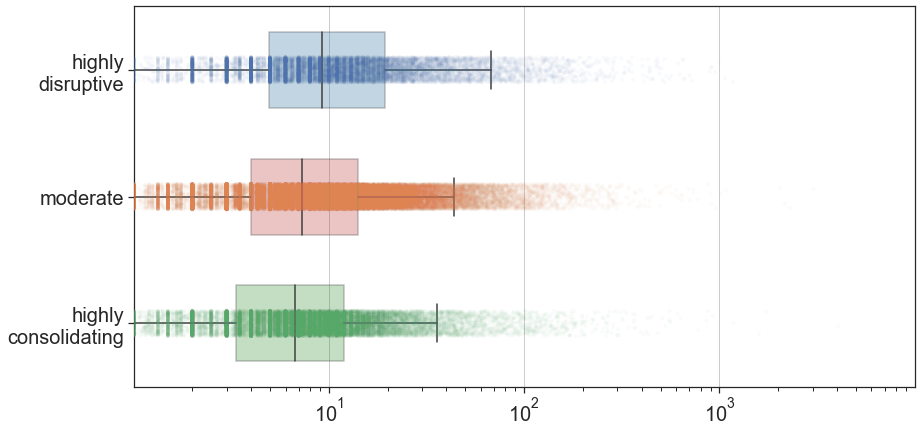

In [48]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(14, 7))
ax.set_xscale("log")

# Set the color palette for different boxplots
palette = ["tab:blue", "tab:red", "tab:green", "tab:orange"]

# Set alpha value for the box
boxprops = dict(alpha=.3)

# Remove fliers from the boxplot
flierprops = dict(marker='')

# Plot the boxplot for each category with corresponding color, alpha and no fliers
sns.boxplot(x=r"B", y="label", data=df,
            whis=[5, 95], width=.6,
            palette=palette,
            boxprops=boxprops,
            flierprops=flierprops)

# Add in points to show each observation
sns.stripplot(x=r"B", y="label", data=df,
              size=4, alpha=0.03, linewidth=0)
plt.xlim((10e-1,10e3))
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="")
plt.yticks(fontsize=20)
plt.xticks([10e0,10e1,10e2],fontsize=20)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 2\1.png",bbox_inches = 'tight')

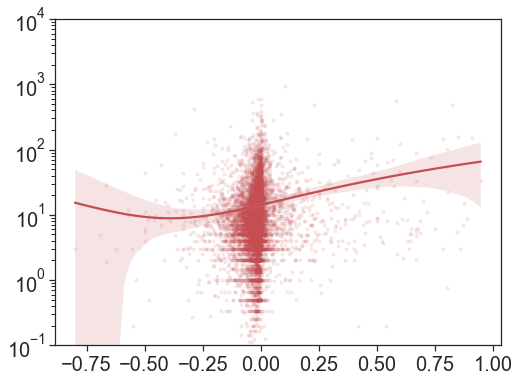

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
dff = df.sample(n = 10000,random_state= 34)
sns.regplot(x=dff['CD5'], y=dff['B'], order=3, color='C3', marker='.', scatter_kws=dict(alpha=0.1), truncate=True, ax=ax)
ax.set_yscale("log")
plt.ylim((10e-2,10e3))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.set(ylabel="")
ax.set(xlabel="")
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 2\2.png",bbox_inches = 'tight')

# da

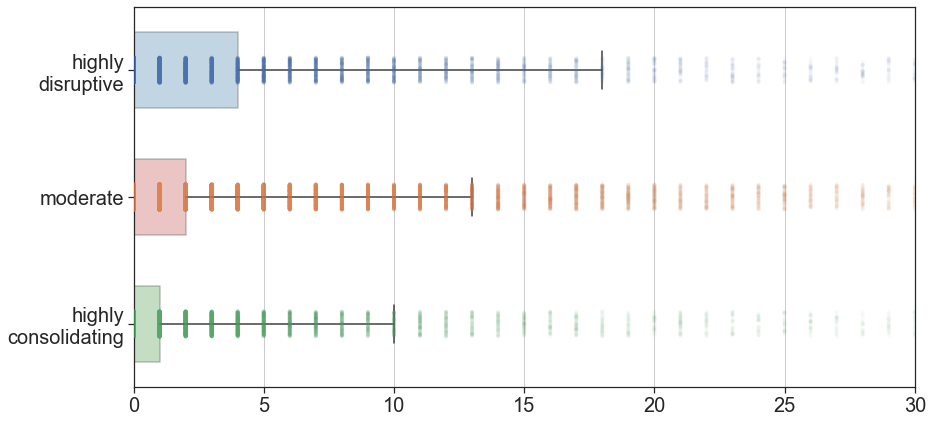

In [50]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(14, 7))
#ax.set_xscale("log")
# Set the color palette for different boxplots
palette = ["tab:blue", "tab:red", "tab:green", "tab:orange"]

# Set alpha value for the box
boxprops = dict(alpha=.3)

# Remove fliers from the boxplot
flierprops = dict(marker='')

# Plot the boxplot for each category with corresponding color, alpha and no fliers
sns.boxplot(x=r"da", y="label", data=df,
            whis=[5, 95], width=.6,
            palette=palette,
            boxprops=boxprops,
            flierprops=flierprops)

# Add in points to show each observation
sns.stripplot(x=r"da", y="label", data=df,
              size=4, alpha=0.03, linewidth=0)
plt.xlim((0,30))
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 2\3.png",bbox_inches = 'tight')

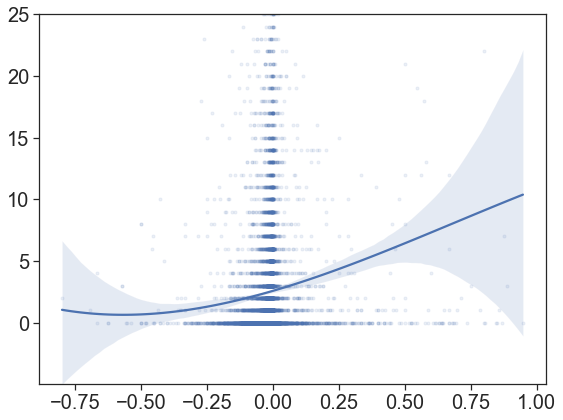

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
dff = df.sample(n = 10000,random_state= 34)
sns.regplot(x=dff['CD5'], y=dff['da'], order=3, color='C0', marker='.', scatter_kws=dict(alpha=0.1), truncate=True, ax=ax)
plt.ylim((-5,25))
plt.yticks([0,5,10,15,20,25],fontsize=20)
plt.xticks(fontsize=20)
ax.set(ylabel="")
ax.set(xlabel="")
fig.tight_layout()
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento SB CD\figs\fig 2\4.png",bbox_inches = 'tight')